In [28]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [12]:
flowers = load_iris(as_frame = True)

In [13]:
# print size and amount of features
print(flowers.data.shape)
# display first 5 rows
display(flowers.data.head())

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
# display data types info
flowers.data.info()
print(flowers.data.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object


In [15]:
# display missing data info
missing_count = flowers.data.isna().sum()
missing_share = flowers.data.isna().mean()
display(pd.DataFrame({"missing_count": missing_count, "missing_share": missing_share}))

,missing_count,missing_share
sepal length (cm),0,0.0
sepal width (cm),0,0.0
petal length (cm),0,0.0
petal width (cm),0,0.0


In [16]:
# display statistic data
display(flowers.data.describe(include="all"))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


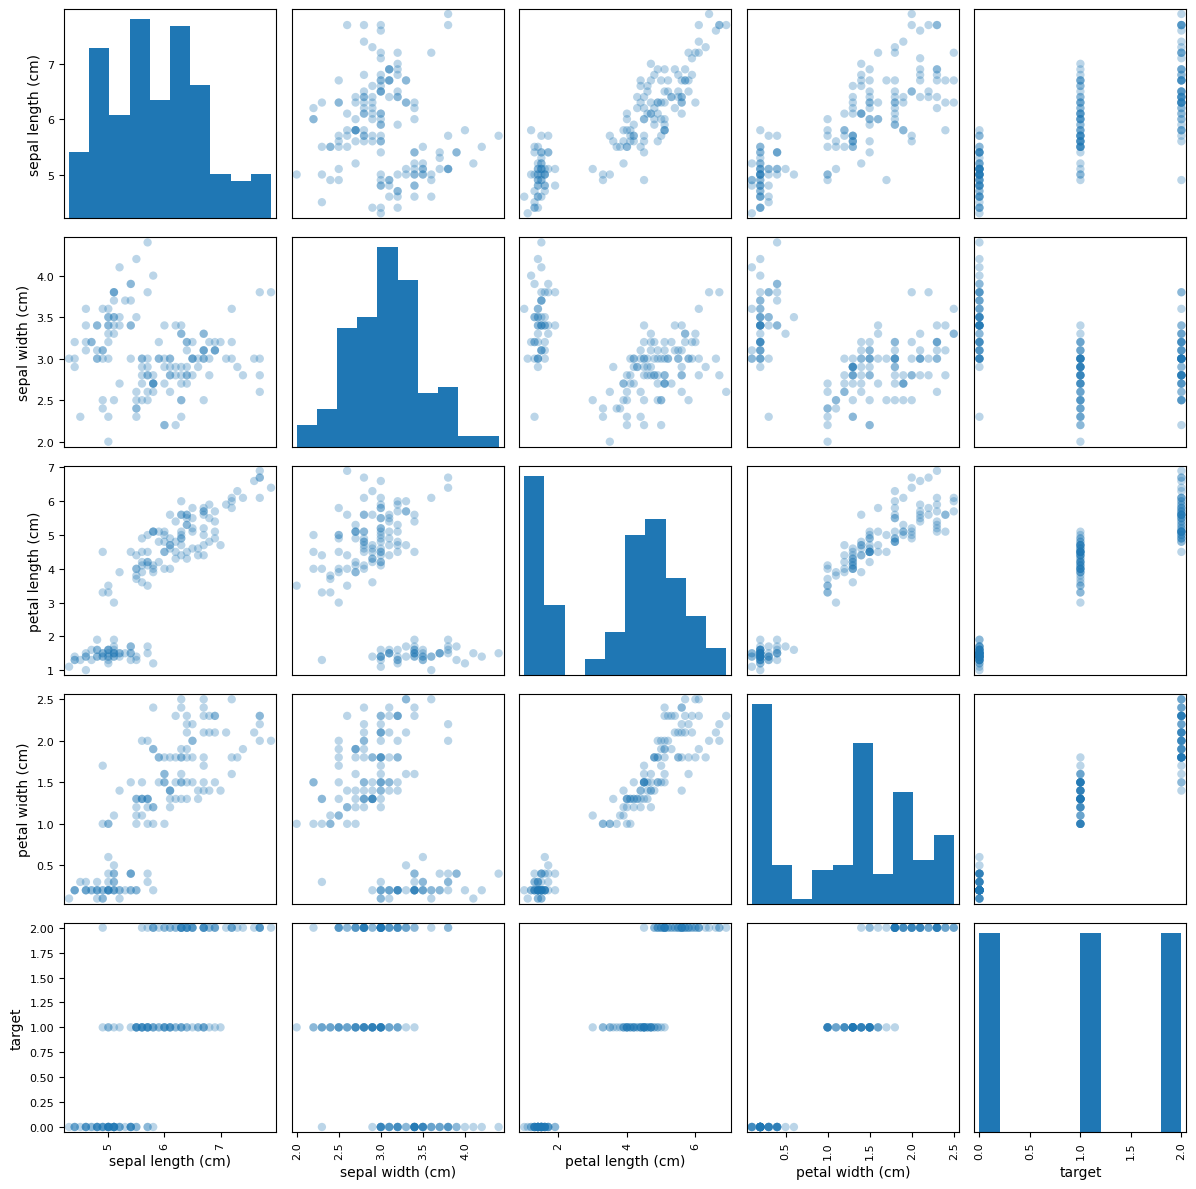

In [17]:
collumns = flowers.frame.select_dtypes(include="number")

sampled = collumns.sample(n=min(2000, len(collumns)), random_state=42) if len(collumns) > 2000 else collumns

axes = scatter_matrix(
    sampled,
    figsize=(12, 12),
    diagonal="hist",
    alpha=0.3,
    marker="o",
    range_padding=0.05
)

for ax in axes.ravel():
    ax.tick_params(labelsize=8)

plt.tight_layout()
plt.show()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(flowers.data, flowers.target, test_size=0.3, random_state=42, stratify=flowers.target)

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [25]:
y_pred = knn.predict(X_test_scaled)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Точність (accuracy): {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Точність (accuracy): 0.91
Precision: 0.93
Recall: 0.91
F1-score: 0.91
